# **Tackling Imbalanced Datasets with Synthetic Minority Oversampling Technique (SMOTE)** 
*Written by Petter Stangeland*
____


In many real-world machine learning tasks, the data is imbalanced — one class may vastly outnumber the others. Think fraud detection, disease diagnosis, or churn prediction: the events of interest (fraud, illness, leaving customers) are rare, making it hard for models to learn from them.

### *Why Class Imbalance is a Problem*
Machine learning models trained on imbalanced data tend to bias toward the majority class. As a result, they might achieve high overall accuracy while completely ignoring the minority class — the one we often care most about.

For example, in a dataset with 95% healthy and 5% sick patients, a model predicting "healthy" for everyone would be 95% accurate — but utterly useless for detecting illness.

### *How SMOTE Works*

We consider classification training data $\mathcal{D}$ which contains $n$ samples, and for simplicty we assume we only have two classes $C_0$ and $C_1$, where $C_0$ is the majority class and $C_1$ the minority class. We start by taking a random sample $s$ from the minority class and consider it's k nearest neighbours $\mathcal{K}$. From the k nearest neighbours $\mathcal{K}$ we pick a random neighbour $\kappa$ and draw a line between our random point $s$ and the random neighbour $\kappa$. To create a synthetic data point we select a random point on this line and choose this as our new synthethic data point $\sigma$. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

Summarised in 3 steps:

1. Chooses a minority class point $s$ at random.

2. Finds its k-nearest neighbors $\mathcal{K}$.

3. Generates a synthetic instance $\sigma$ somewhere along the line segment between the chosen point $s$ and one of its neighbors $\kappa$.

### *Examples*

In order to get a intuitive understanding of how SMOTE works, let's look at a couple of examples which showcases the strengths and weaknesses of SMOTE.

In [24]:
from smote import SMOTE, pi, circles
import matplotlib.pyplot as plt

Throughout this post, I import several functions and utilities from an external Python file to keep the code examples clean and focused. If you’d like to see the full implementation, including data preprocessing, model training, and evaluation, the complete source code is available on GitHub https://github.com/saafda/blog_post_1_smote.git.

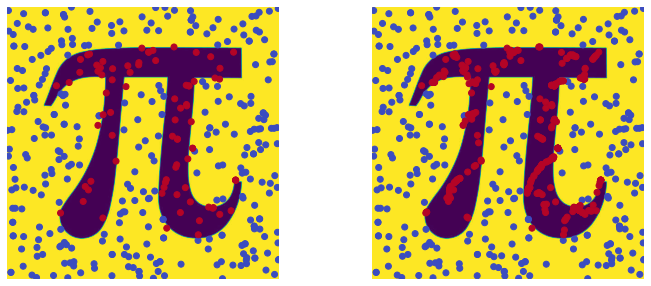

In [42]:
PI = pi()

ratio = 0.2
k_neighbours = 5
N_datapoints = 400
M_synthesizedpoints = 300


pi_smote = SMOTE(PI.data)
c0, c1 = pi_smote.generate_data(ratio, N_datapoints)
c1_new = pi_smote.smote(c1, M_synthesizedpoints, k_neighbours)

pi_smote.plot((c0,c0),(c1,c1_new), PI.image, (plt.cm.viridis, plt.cm.coolwarm, plt.cm.coolwarm_r), (12,5))

This example provides a visual intuition for how SMOTE generates synthetic points: the minority class (the $\pi$ symbol) is synthetically expanded by interpolating between existing minority samples. As a result, the shape becomes more filled out, and classification algorithms can better recognize its presence.

However, the plot below reveals a key limitation: when the minority class is very sparse or fragmented (here 95:5 ratio), as in thin parts of the π shape, SMOTE can struggle. The synthetic samples generated by SMOTE may not be able to meaningfully represent the original structure, effectively here giving the impression of many smaller seperate groups.

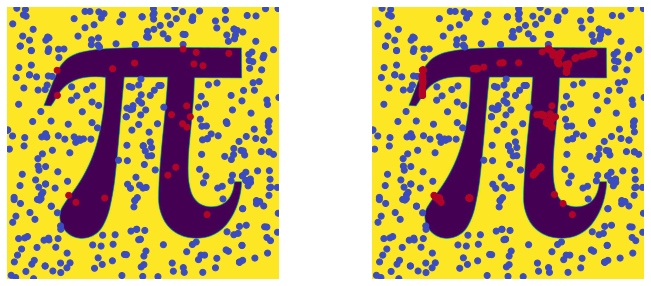

In [43]:
ratio = 0.05
c0, c1 = pi_smote.generate_data(ratio, N_datapoints)
c1_new = pi_smote.smote(c1, M_synthesizedpoints, k_neighbours)

pi_smote.plot((c0,c0),(c1,c1_new), PI.image, (plt.cm.viridis, plt.cm.coolwarm, plt.cm.coolwarm_r), (12,5))

The final example clearly illustrates a case where SMOTE works exceptionally well. The minority class consists of two convex-shaped, well-defined circular clusters. Since the structure is dense and locally coherent, SMOTE is able to generate synthetic samples that stay within the true class boundaries and reinforce the shape of each cluster. This helps the model generalize better without introducing noise or class overlap. It’s a textbook example of SMOTE’s strength: improving class balance while preserving the underlying geometry of the data.

In [50]:
CIRCLES = circles() 

ratio = 0.1
k_neighbours = 5
N_datapoints = 500
M_synthesizedpoints = 500

circles_smote = SMOTE(CIRCLES.data)
c0, c1 = circles_smote.generate_data(ratio, N_datapoints)
c1_new = circles_smote.smote(c1, M_synthesizedpoints, k_neighbours)

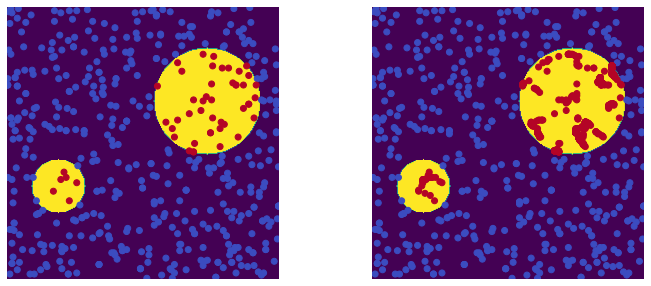

In [51]:
circles_smote.plot((c0,c0), (c1, c1_new), CIRCLES.image, (plt.cm.viridis, plt.cm.coolwarm, plt.cm.coolwarm_r), (12,5))

### *Conclusion*

SMOTE is a powerful and widely-used technique for addressing class imbalance in machine learning. By generating synthetic samples from the minority class, it helps models learn more meaningful decision boundaries and reduces the bias toward the majority class.

Its key strengths lie in its simplicity, effectiveness, and ability to improve performance on imbalanced datasets without simply duplicating data. In structured, well-separated cases — like the two-circle example — SMOTE can dramatically enhance model learning.

However, SMOTE isn’t without limitations. When the minority class is sparse, highly non-convex, or overlaps with the majority class, synthetic points may land in the wrong regions and degrade performance. 

Used thoughtfully though SMOTE remains a valuable tool toolkit for handling imbalanced data.

### *Sources*

* Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16(16), 321–357. https://doi.org/10.1613/jair.953


* Brownlee, J. (2020, January 16). SMOTE for Imbalanced Classification with Python. Machine Learning Mastery. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

* Wikipedia Contributors. (2019, July 3). Oversampling and undersampling in data analysis. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

‌
‌